# QKeras dense layer comparison


### Imports

### Data creation 

In [1]:
import tensorflow as tf
import keras
import numpy as np
import time
import random

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, LSTM, GRU, SimpleRNN, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from collections import deque


from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

import qkeras
from qkeras import *


2022-04-14 15:04:52.602264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/gcc/9.2.0/x86_64-centos7/bin/:/inteltools/altera/21.1.0.169.pro/gcc/lib64:/inteltools/altera/21.1.0.169.pro/hls/host/linux64/lib
2022-04-14 15:04:52.602281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Creating a simple dataset using numpy

x = np.linspace(-1, 1, 1000)
y = np.sin(5*x)

x_val = np.linspace(-1, 1, 100)
y_val = np.sin(5*x_val)

x_test = np.linspace(-1, 1, 1000)
y_test = np.sin(5*x_test)


In [3]:
import os
print(os.environ['LD_LIBRARY_PATH'])
print('and\n', os.environ['PATH'])

/cvmfs/sft.cern.ch/lcg/releases/gcc/9.2.0/x86_64-centos7/bin/:/inteltools/altera/21.1.0.169.pro/gcc/lib64:/inteltools/altera/21.1.0.169.pro/hls/host/linux64/lib
and
 /cvmfs/sft.cern.ch/lcg/releases/gcc/9.2.0/x86_64-centos7/bin/:/inteltools/altera/21.1.0.169.pro/quartus/bin:/inteltools/altera/21.1.0.169.pro/gcc/bin:/inteltools/altera/21.1.0.169.pro/hls/bin:/inteltools/altera/21.1.0.169.pro/qsys/bin:/inteltools/altera/21.1.0.169.pro/quartus/bin:/inteltools/mentor/2018-19/RHELx86/QUESTA-CORE-PRIME_10.7c/questasim/linux_x86_64:/atlas/bonnet/.vscode-server/bin/dfd34e8260c270da74b5c2d86d61aee4b6d56977/bin/remote-cli:/usr/lib64/qt-3.3/bin:/atlas/bonnet/miniconda3/envs/hls4ml-tutorial/bin:/atlas/bonnet/miniconda3/condabin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin


In [4]:
"""with open("/outputs.txt", "w") as inputs_file :
    for i in range(1000):
        save_inputs = str(float(y[i]))
        inputs_file.write("{}\n".format(save_inputs))"""

'with open("/outputs.txt", "w") as inputs_file :\n    for i in range(1000):\n        save_inputs = str(float(y[i]))\n        inputs_file.write("{}\n".format(save_inputs))'

### Dense network

Classic network

In [5]:
output = 1

checkpoint_filepath = '/atlas/bonnet/tmp/model_checkpoint'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                                save_weights_only=True,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)

d_model = Sequential()

d_model.add(Dense(10,input_dim= 1, activation='relu'))
d_model.add(Dense(output, activation='linear'))
d_model.compile(loss="mse", optimizer=Adam(lr=0.001))

d_model.summary()

d_model.fit(x, y, validation_data= (x_val,y_val), epochs=50, batch_size=10, callbacks=[reduce_lr,model_checkpoint_callback])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2022-04-14 15:05:10.083514: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/gcc/9.2.0/x86_64-centos7/bin/:/inteltools/altera/21.1.0.169.pro/gcc/lib64:/inteltools/altera/21.1.0.169.pro/hls/host/linux64/lib
2022-04-14 15:05:10.083572: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-14 15:05:10.083614: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marsattack3): /proc/driver/nvidia/version does not exist
2022-04-14 15:05:10.084154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other 

100/100 [==============================] - 0s 2ms/step - loss: 0.5075 - val_loss: 0.4865 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 0s 849us/step - loss: 0.4675 - val_loss: 0.4512 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 0s 812us/step - loss: 0.4367 - val_loss: 0.4237 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 0s 916us/step - loss: 0.4114 - val_loss: 0.3999 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 0s 775us/step - loss: 0.3890 - val_loss: 0.3783 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 0s 840us/step - loss: 0.3689 - val_loss: 0.3582 - lr: 0.0010
Epoch 7/50
100/100 [==============================] - 0s 839us/step - loss: 0.3495 - val_loss: 0.3388 - lr: 0.0010
Epoch 8/50
100/100 [==============================] - 0s 814us/step - loss: 0.3305 - val_loss: 0.3202 - lr: 0.0010
Epoch 9/50
100/100 [==============================] - 0s 804us/step - loss: 0.3120 - val_loss

Quantized network, saving weights function : 

In [6]:
output = 1


def quantized_model (bits, original_weights):
    qcheckpoint_filepath = '/atlas/bonnet/tmp/qmodel_checkpoint'
    qmodel_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=qcheckpoint_filepath,
                                                                    save_weights_only=True,
                                                                    monitor='val_loss',
                                                                    mode='min',
                                                                    save_best_only=True)


    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)

    qd_model = Sequential()
    
    qd_model.add(QDense(10,
                        input_dim= 1,   
                        activation='relu', 
                        kernel_quantizer=quantized_bits(**bits),
                        bias_quantizer=quantized_bits(**bits)))
    qd_model.add(QDense(output, 
                        activation='linear',
                        kernel_quantizer=quantized_bits(**bits),
                        bias_quantizer=quantized_bits(**bits)))
    qd_model.compile(loss="mse", optimizer=Adam(lr=0.0001))
    
    qd_model.summary()
    #using the weight from the classic network as a base
    qd_model.set_weights(original_weights.get_weights())
    qd_model.fit(x, y, validation_data= (x_val,y_val),epochs = 1, callbacks=[qmodel_checkpoint_callback,reduce_lr])
    qd_model.load_weights(qcheckpoint_filepath)

    return qd_model

def model_saving (): 
    models =[]
    for i in range(9):
        bits_parameter = {'bits':(i+4)*2, 'integer': 4, 'symmetric': 0, 'alpha':1}

        models.append( quantized_model(bits_parameter, d_model))
        print( 'bit width ', bits_parameter)        
    return models
        
qmodels = model_saving()
        


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_dense (QDense)            (None, 10)                20        
                                                                 
 q_dense_1 (QDense)          (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.0205 - lr: 1.0000e-04
bit width  {'bits': 8, 'integer': 4, 'symmetric': 0, 'alpha': 1}
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_dense_2 (QDense)          (None, 10)                20        
                                                                 

In [21]:
for q in qmodels:
    print(q.layers[0].kernel_quantizer)

quantized_bits(8,4,0,alpha=1)
quantized_bits(10,4,0,alpha=1)
quantized_bits(12,4,0,alpha=1)
quantized_bits(14,4,0,alpha=1)
quantized_bits(16,4,0,alpha=1)
quantized_bits(18,4,0,alpha=1)
quantized_bits(20,4,0,alpha=1)
quantized_bits(22,4,0,alpha=1)
quantized_bits(24,4,0,alpha=1)


In [8]:
#saving and storing the quantized model
for i, q in enumerate(qmodels):
    q.save(f'qmodels/models/qmodel{i}.h5')

#saving and storing the weights of the quantized model

q_weights = []

for i, q in enumerate(qmodels):  #storing them into an array
    q_weights.append(qkeras.utils.model_save_quantized_weights(q))


for i, q in enumerate(qmodels): #saving them
    qkeras.utils.model_save_quantized_weights(q,f'qmodels/weights/qmodel_weights{i}.h5')


... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model
... quantizing model


In [9]:
qmodels[0].get_weights()

[array([[-1.25 , -1.375, -0.625, -1.375, -1.   , -0.75 , -1.25 , -0.625,
          1.75 ,  1.   ]], dtype=float32),
 array([ 0.25 , -0.5  ,  0.125, -0.5  ,  0.25 ,  0.125, -0.25 ,  0.125,
        -0.625,  0.375], dtype=float32),
 array([[-0.5  ],
        [ 1.625],
        [-0.875],
        [ 1.75 ],
        [-0.875],
        [-0.875],
        [ 1.75 ],
        [-1.   ],
        [-2.375],
        [ 0.75 ]], dtype=float32),
 array([0.5], dtype=float32)]

Saving the classic model with 'manually' quantized weights

In [10]:
config = d_model.get_config()
tmp_model = Sequential().from_config(config)


for i, w in enumerate(qmodels) :
    print(w)
    
    #taking the quantized weight and pass them into a quantizer previously used in order to 
    #'keep them quantized' even after they have been stored 
    tmp_model.set_weights([w.layers[0].kernel_quantizer(n) for n in w.get_weights()])

    #storing the model into json and and h5
    model_json = tmp_model.to_json()
    with open(f"models/model{i}.json", "w") as json_file:
        json_file.write(model_json)
    tmp_model.save_weights(f"models/model{i}.h5")
    print("Saved model to disk")




Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk


Comparing the two methods

In [11]:
qm = qkeras.utils.load_qmodel('qmodels/models/qmodel0.h5' )
qm.load_weights('qmodels/weights/qmodel_weights0.h5')
print(qm.get_weights())

qm.load_weights('models/model0.h5')
print(qm.get_weights())

[array([[-1.25 , -1.375, -0.625, -1.375, -1.   , -0.75 , -1.25 , -0.625,
         1.75 ,  1.   ]], dtype=float32), array([ 0.25 , -0.5  ,  0.125, -0.5  ,  0.25 ,  0.125, -0.25 ,  0.125,
       -0.625,  0.375], dtype=float32), array([[-0.5  ],
       [ 1.625],
       [-0.875],
       [ 1.75 ],
       [-0.875],
       [-0.875],
       [ 1.75 ],
       [-1.   ],
       [-2.375],
       [ 0.75 ]], dtype=float32), array([0.5], dtype=float32)]
[array([[-1.25 , -1.375, -0.625, -1.375, -1.   , -0.75 , -1.25 , -0.625,
         1.75 ,  1.   ]], dtype=float32), array([ 0.25 , -0.5  ,  0.125, -0.5  ,  0.25 ,  0.125, -0.25 ,  0.125,
       -0.625,  0.375], dtype=float32), array([[-0.5  ],
       [ 1.625],
       [-0.875],
       [ 1.75 ],
       [-0.875],
       [-0.875],
       [ 1.75 ],
       [-1.   ],
       [-2.375],
       [ 0.75 ]], dtype=float32), array([0.5], dtype=float32)]


## HLS4ML CONVERSION PART

In [12]:
import hls4ml
import plotting



/atlas/bonnet/hls4ml/hls4ml/hls4ml/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [13]:
config = hls4ml.utils.config_from_keras_model(qmodels[0], granularity='name')

Interpreting Sequential
Topology:
Layer name: q_dense_input, layer type: Input
Layer name: q_dense, layer type: QDense
Layer name: q_dense_1, layer type: QDense


In [14]:
config

{'Model': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
  'Strategy': 'Latency'},
 'LayerName': {'q_dense_input': {'Precision': {'result': 'ap_fixed<16,6>'}},
  'q_dense': {'Precision': {'weight': 'ap_fixed<8,5>',
    'bias': 'ap_fixed<8,5>'},
   'ReuseFactor': 1},
  'q_dense_1': {'Precision': {'weight': 'ap_fixed<8,5>',
    'bias': 'ap_fixed<8,5>'},
   'ReuseFactor': 1}}}

In [15]:
print("-----------------------------------")
print (config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(d_model,
                                                       hls_config=config,
                                                       output_dir='models/hls_models',

                                                       backend='Quartus')
hls_model.compile()

y_qkeras = qmodels[0].predict(x_test)
y_hls = hls_model.predict(x_test.reshape(x_test.shape[0],1))

-----------------------------------
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense': {'Precision': {'weight': 'ap_fixed<8,5>', 'bias': 'ap_fixed<8,5>'}, 'ReuseFactor': 1}, 'q_dense_1': {'Precision': {'weight': 'ap_fixed<8,5>', 'bias': 'ap_fixed<8,5>'}, 'ReuseFactor': 1}}}
-----------------------------------
Interpreting Sequential
Topology:
Layer name: dense_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: dense, layer type: Dense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 484us/step


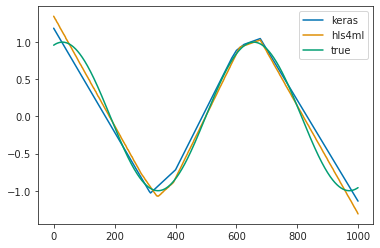

In [16]:
plt.plot(y_qkeras)
plt.plot(y_hls)
plt.plot(y_test)
plt.legend(['keras', 'hls4ml', 'true'])

In [17]:
d_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Interpreting Sequential
Topology:
Layer name: q_dense_input, layer type: Input
Layer name: q_dense, layer type: QDense
Layer name: q_dense_1, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense': {'Precision': {'weight': 'ap_fixed<8,5>', 'bias': 'ap_fixed<8,5>'}, 'ReuseFactor': 1}, 'q_dense_1': {'Precision': {'weight': 'ap_fixed<8,5>', 'bias': 'ap_fixed<8,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_1, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 426us/step


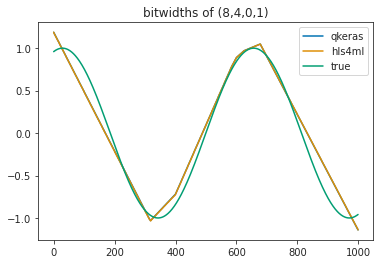

Interpreting Sequential
Topology:
Layer name: q_dense_2_input, layer type: Input
Layer name: q_dense_2, layer type: QDense
Layer name: q_dense_3, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_2_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_2': {'Precision': {'weight': 'ap_fixed<10,5>', 'bias': 'ap_fixed<10,5>'}, 'ReuseFactor': 1}, 'q_dense_3': {'Precision': {'weight': 'ap_fixed<10,5>', 'bias': 'ap_fixed<10,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_2_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_2, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_3, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 485us/step


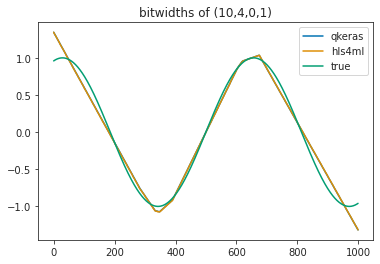

Interpreting Sequential
Topology:
Layer name: q_dense_4_input, layer type: Input
Layer name: q_dense_4, layer type: QDense
Layer name: q_dense_5, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_4_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_4': {'Precision': {'weight': 'ap_fixed<12,5>', 'bias': 'ap_fixed<12,5>'}, 'ReuseFactor': 1}, 'q_dense_5': {'Precision': {'weight': 'ap_fixed<12,5>', 'bias': 'ap_fixed<12,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_4_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_4, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_5, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 439us/step


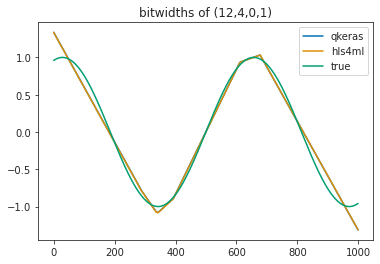

Interpreting Sequential
Topology:
Layer name: q_dense_6_input, layer type: Input
Layer name: q_dense_6, layer type: QDense
Layer name: q_dense_7, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_6_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_6': {'Precision': {'weight': 'ap_fixed<14,5>', 'bias': 'ap_fixed<14,5>'}, 'ReuseFactor': 1}, 'q_dense_7': {'Precision': {'weight': 'ap_fixed<14,5>', 'bias': 'ap_fixed<14,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_6_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_6, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_7, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 449us/step


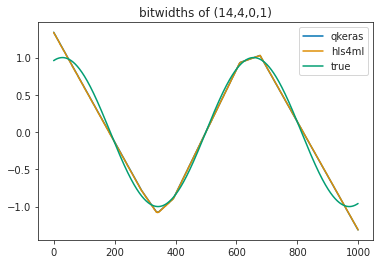

Interpreting Sequential
Topology:
Layer name: q_dense_8_input, layer type: Input
Layer name: q_dense_8, layer type: QDense
Layer name: q_dense_9, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_8_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_8': {'Precision': {'weight': 'ap_fixed<16,5>', 'bias': 'ap_fixed<16,5>'}, 'ReuseFactor': 1}, 'q_dense_9': {'Precision': {'weight': 'ap_fixed<16,5>', 'bias': 'ap_fixed<16,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_8_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_8, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_9, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 451us/step


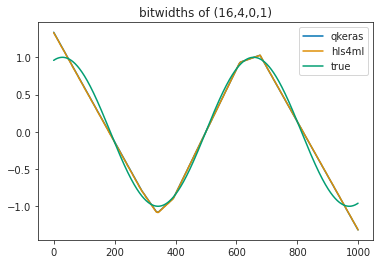

Interpreting Sequential
Topology:
Layer name: q_dense_10_input, layer type: Input
Layer name: q_dense_10, layer type: QDense
Layer name: q_dense_11, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_10_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_10': {'Precision': {'weight': 'ap_fixed<18,5>', 'bias': 'ap_fixed<18,5>'}, 'ReuseFactor': 1}, 'q_dense_11': {'Precision': {'weight': 'ap_fixed<18,5>', 'bias': 'ap_fixed<18,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_10_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_10, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_11, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 455us/step


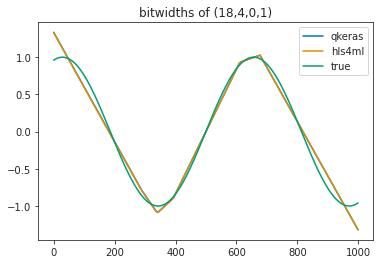

Interpreting Sequential
Topology:
Layer name: q_dense_12_input, layer type: Input
Layer name: q_dense_12, layer type: QDense
Layer name: q_dense_13, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_12_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_12': {'Precision': {'weight': 'ap_fixed<20,5>', 'bias': 'ap_fixed<20,5>'}, 'ReuseFactor': 1}, 'q_dense_13': {'Precision': {'weight': 'ap_fixed<20,5>', 'bias': 'ap_fixed<20,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_12_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_12, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_13, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 415us/step


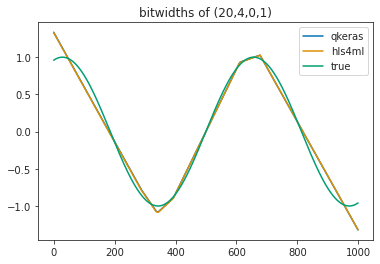

Interpreting Sequential
Topology:
Layer name: q_dense_14_input, layer type: Input
Layer name: q_dense_14, layer type: QDense
Layer name: q_dense_15, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_14_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_14': {'Precision': {'weight': 'ap_fixed<22,5>', 'bias': 'ap_fixed<22,5>'}, 'ReuseFactor': 1}, 'q_dense_15': {'Precision': {'weight': 'ap_fixed<22,5>', 'bias': 'ap_fixed<22,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_14_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_14, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_15, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 456us/step


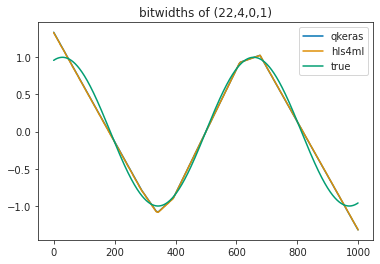

Interpreting Sequential
Topology:
Layer name: q_dense_16_input, layer type: Input
Layer name: q_dense_16, layer type: QDense
Layer name: q_dense_17, layer type: QDense
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}, 'LayerName': {'q_dense_16_input': {'Precision': {'result': 'ap_fixed<16,6>'}}, 'q_dense_16': {'Precision': {'weight': 'ap_fixed<24,5>', 'bias': 'ap_fixed<24,5>'}, 'ReuseFactor': 1}, 'q_dense_17': {'Precision': {'weight': 'ap_fixed<24,5>', 'bias': 'ap_fixed<24,5>'}, 'ReuseFactor': 1}}}
Interpreting Sequential
Topology:
Layer name: q_dense_16_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: q_dense_16, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 10]
Layer name: q_dense_17, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 1]
Creating HLS model
Writing HLS project
Done
32/32 [==============================] - 0s 443us/step


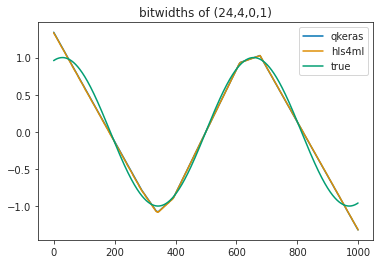

In [18]:
for i in range (9):
    config = hls4ml.utils.config_from_keras_model(qmodels[i], granularity='name')
    print(config)
    hls_model = hls4ml.converters.convert_from_keras_model(qmodels[i],
                                                        hls_config=config,
                                                        output_dir='models/hls_models',
                                                        part='1SG280HU2F50E2VG',
                                                        backend='Quartus')
    hls_model.compile()

    y_qkeras = qmodels[i].predict(x_test)
    y_hls = hls_model.predict(x_test.reshape(x_test.shape[0],1))
    y_keras = d_model.predict(x_test)
    plt.figure()
    #plt.subplot()
    #plt.plot(y_keras)
    plt.plot(y_qkeras)
    plt.plot(y_hls)
    plt.plot(y_test)    
    plt.legend(['qkeras', 'hls4ml', 'true'])
    plt.title(f'bitwidths of ({(i+4)*2},4,0,1)')
    plt.show()

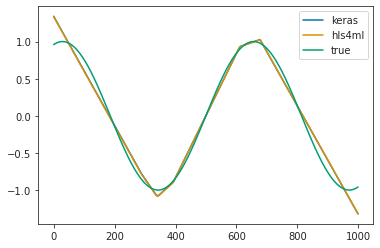

In [19]:
plt.plot(y_qkeras)
plt.plot(y_hls)
plt.plot(y_test)
plt.legend(['keras', 'hls4ml', 'true'])
